**Problem 1.** Implement a function, that chooses random dates out of 
 until a repeat occurs. The function should return the number of the step in which that happened. Run the function 10 000
 times. Plot a histogram of the return values

**Problem 2.** Consider the problem of sampling with known probabilities $p_1,\ldots,p_d$. Suppose that you have a black-box that samples with probabilities $q_1,\ldots,q_d$ that are close to $p_1,\ldots,p_d$, say
$$ \forall_{i=1,\ldots,n} p_i \le (1+\varepsilon)q_i.$$

* How can you use this black-box to sample with probabilities $p_1,\ldots,p_d$? It is expected, that the running time of the algorithm would be non-deterministic.
* Prove that your algorithm is correct.
* Implement the algorithm and use it to give a faster implementation for **Problem 1**.

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('us_births_69_88.csv')
births = np.array(data['births'])
total_births = np.sum(births)

In [2]:
probabilities = births / total_births
p_max = np.max(probabilities)

def sampling_function():
    while True:
        day = np.random.randint(12 * 31)
        uni = np.random.uniform(0, 1)
        accept_probability = probabilities[day] / p_max
        if uni < accept_probability:
            return day

In [3]:
def find_first_repetition():
    sampled = set()
    date = sampling_function()
    counter = 1
    while date not in sampled:
        sampled.add(date)
        date = sampling_function()
        counter += 1
    return counter

result = [find_first_repetition() for i in range(10_000)]

## Argumentation

Let's denote by $Q_i$ the drawing of the $i$-th day with an equal probability distribution, hence for each $$\forall_{i=1,...,n}: P(Q_i) = \frac{1}{n}$$

The second draw will mean acceptance or rejection of the drawn day. Let $A$ denote the acceptance of any day and let $P(A | Q_i)=\frac{p_i}{p_{max}}$, where $p_{max}$ is the largest among $p_i$.

The algorithm will consist first of drawing the day with equal probability, and then accepting the drawn day. If we reject the day, we repeat the whole process.

As a result, taking into account only accepted values, we get the probability of drawing the $i$-th day: $$ P(Q_i | A) = \frac{P(A | Q_i) \cdot P(Q_i)}{P(A)} = \frac{(\frac{p_i}{p_{max}})\cdot \frac{1}{n}}{\sum_{i=1}^n P(A | Q_i)\cdot P(Q_i)} = \frac{(\frac{p_i}{p_{max}})\cdot \frac{1}{n}}{\sum_{i=1}^n \frac{p_i}{p_{max}} \cdot \frac{1}{n}} = \frac{p_i}{\sum_{i=1}^n p_i} = p_i$$

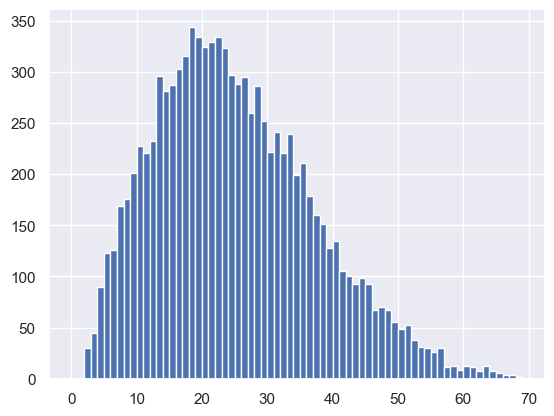

In [4]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(result, bins=range(70))
plt.show()